# Clustering

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import umap.umap_ as umap
from sklearn.tree import DecisionTreeClassifier
from kmodes.kprototypes import KPrototypes

# Load Preprocessed Data from previous notebook

In [25]:
df = pd.read_csv('./preprocessed_numeric.csv')
df_cat = pd.read_csv('./preprocessed_categorical.csv')
df.drop("Dropout", axis=1, inplace=True)

# Feature Scaling

In [26]:
def clusterize(model):
    clusters = model.fit_predict(df_scaled_full, categorical=list(range(10, 18)))

    df_clusters = pd.concat([df_scaled_full, pd.Series(clusters, name='labels', index=df_scaled_full.index)], axis=1)
    
    return df_clusters

In [27]:
# two_dim = TSNE(random_state=42).fit_transform(df)
def plot_clusters_tsne(dataframe):
    # t-SNE visualization
    pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=dataframe['labels'], colormap='tab10', figsize=(10,10))
    plt.show()

In [28]:
def plot_clusters_umap(dataframe):
    umap_result = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(df)
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c=dataframe['labels'], cmap='viridis', alpha=0.7)
    plt.title('UMAP Visualization of Clusters')
    plt.show()

In [29]:
def assess_feature_importance(dataframe, depth=None):
    # Preparing the data
    X = dataframe.drop('labels', axis=1)
    y = dataframe['labels']

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fitting the decision tree
    dt = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dt.fit(X_train, y_train)
    print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))
    return pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [30]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

In [31]:
df_scaled_full = pd.concat([pd.DataFrame(scaled_df, columns=df.columns), df_cat], axis=1)
df_scaled_full.drop(["Gender_Female", "Gender_Male", "UseByTime", "Dropout"], axis=1, inplace=True)

In [32]:
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)
x = clusterize(kproto)
x.groupby('labels').mean().T

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2466, ncost: 2045.4149867193694
Run: 1, iteration: 2/100, moves: 1930, ncost: 1869.2087848230112
Run: 1, iteration: 3/100, moves: 55, ncost: 1869.1675007597062
Run: 1, iteration: 4/100, moves: 10, ncost: 1869.1618104416334
Run: 1, iteration: 5/100, moves: 3, ncost: 1869.1612285790554
Run: 1, iteration: 6/100, moves: 0, ncost: 1869.1612285790554
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 6040, ncost: 1944.9576160438178
Run: 2, iteration: 2/100, moves: 963, ncost: 1871.416825335867
Run: 2, iteration: 3/100, moves: 13, ncost: 1871.4046060996932
Run: 2, iteration: 4/100, moves: 0, ncost: 1871.4046060996932
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 2084, ncost: 1838.

labels,0,1,2,3
Income,0.229802,0.099141,0.234084,0.139410
EnrollmentDurationInDays,0.173387,0.119400,0.145170,0.219600
LastPeriodDurationInDays,0.506295,0.005809,0.004041,0.514576
DaysWithoutFrequency,0.046541,0.038180,0.048541,0.065208
LifetimeValue,0.034814,0.088989,0.036000,0.060031
NumberOfFrequencies,0.037454,0.044157,0.040564,0.029858
AttendedClasses,0.003254,0.069421,0.004142,0.046258
AllowedWeeklyVisitsBySLA,0.993447,0.220076,0.993214,0.198371
AllowedNumberOfVisitsBySLA,0.246536,0.072327,0.186164,0.082505
RealNumberOfVisits,0.068306,0.047863,0.070335,0.036642


<Axes: >

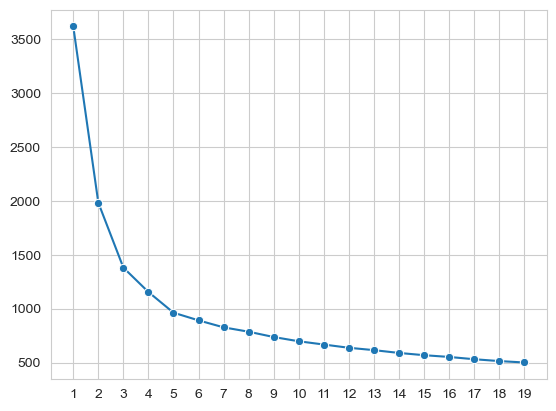

In [12]:
clusters_range = range(1, 20)
inertia = []
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    
plot = sns.lineplot(x=clusters_range, y=inertia, marker='o')
plot.set_xticks(clusters_range)
plot

In [13]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_4_clustered_df = clusterize(kmeans)
# plot_clusters_tsne(kmeans_4_clustered_df)
kmeans_4_clustered_df.groupby('labels').mean().T
# assess_feature_importance(kmeans_4_clustered_df)
# kmeans_4_clustered_df.groupby('labels').size()

Silhouette Score: 0.458


labels,0,1,2,3
Income,2519.446694,1597.475665,2476.055402,1237.726524
EnrollmentDurationInDays,281.175439,422.104478,336.839335,233.672158
LastPeriodDurationInDays,181.474434,368.263465,365.311911,182.121362
DaysWithoutFrequency,84.753186,113.567164,81.064266,67.049423
LifetimeValue,240.394482,402.666911,233.468211,593.386304
NumberOfFrequencies,42.696806,31.881895,39.580886,46.664470
AttendedClasses,2.015894,26.980532,1.659280,40.494234
AllowedWeeklyVisitsBySLA,6.987404,2.218040,6.984488,2.372872
AllowedNumberOfVisitsBySLA,45.268285,20.552511,59.791388,18.325810
RealNumberOfVisits,5.924576,3.065542,5.762881,4.023613


In [14]:
assess_feature_importance(kmeans_4_clustered_df)

It is estimated that in average, we are able to predict 99.89% of the customers correctly


AllowedWeeklyVisitsBySLA      0.557013
LastPeriodDurationInDays      0.442755
NumberOfFrequencies           0.000232
Income                        0.000000
EnrollmentDurationInDays      0.000000
DaysWithoutFrequency          0.000000
LifetimeValue                 0.000000
AttendedClasses               0.000000
AllowedNumberOfVisitsBySLA    0.000000
RealNumberOfVisits            0.000000
dtype: float64

<Axes: xlabel='labels'>

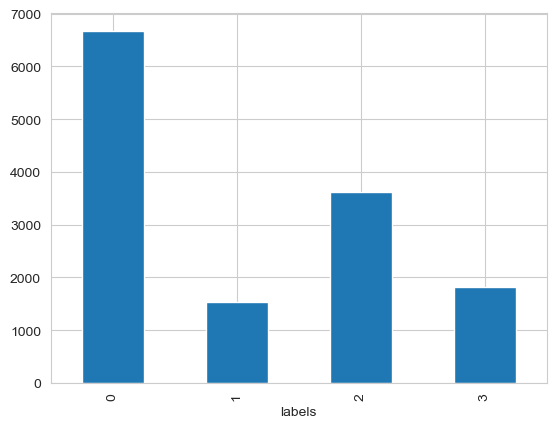

In [15]:
# bar plot size of clusters
kmeans_4_clustered_df.groupby('labels').size().plot(kind='bar')

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


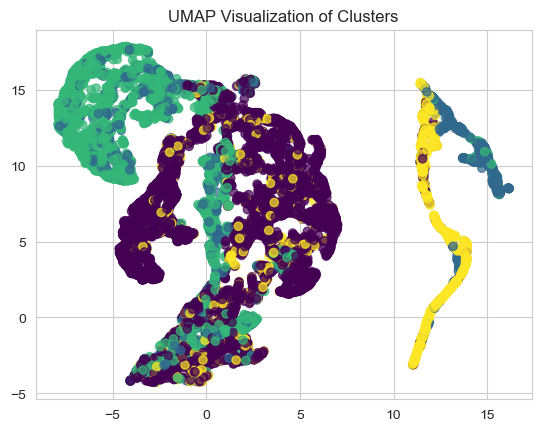

In [16]:
plot_clusters_umap(kmeans_4_clustered_df)

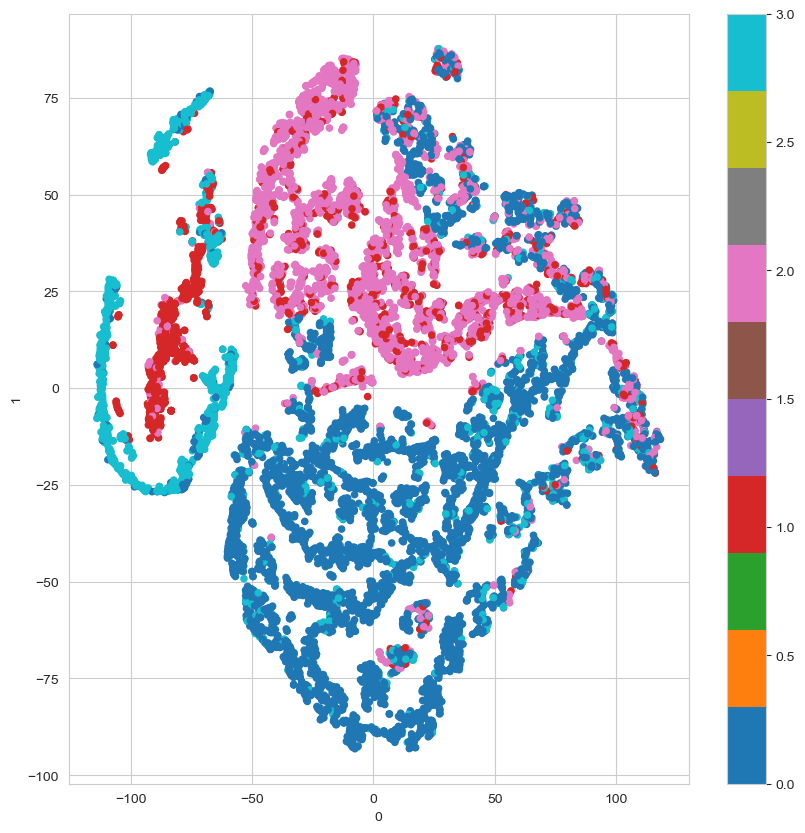

In [17]:
plot_clusters_tsne(kmeans_4_clustered_df)

In [18]:
cat_df_clusters = pd.concat([df_cat, kmeans_4_clustered_df['labels']], axis=1)
cat_df_clusters.groupby('labels').sum()

,Gender_Male,Gender_Female,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,Dropout
labels,,,,,,,,,,,,
0,2643,4026,421,54.0,935.0,5293.0,114.0,15.0,792.0,214.0,2.0,5497
1,595,946,13,4.0,932.0,153.0,243.0,210.0,42.0,54.0,13.0,1461
2,1502,2108,222,32.0,702.0,2424.0,68.0,20.0,607.0,61.0,0.0,3463
3,768,1053,13,13.0,1289.0,194.0,307.0,77.0,62.0,41.0,10.0,929


In [19]:
# Use DBSCAN To cluster
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_df = clusterize(dbscan)
dbscan_df.groupby('labels').mean().T

Silhouette Score: 0.368


labels,-1,0,1,2
Income,3680.000,2231.239140,2313.714286,2752.105263
EnrollmentDurationInDays,753.200,305.687822,220.828571,199.052632
LastPeriodDurationInDays,219.200,250.153586,546.000000,546.000000
DaysWithoutFrequency,124.800,84.550287,107.571429,116.526316
LifetimeValue,3297.374,303.378867,215.596286,134.352632
NumberOfFrequencies,309.800,41.197835,11.171429,13.105263
AttendedClasses,225.600,9.813650,9.314286,0.421053
AllowedWeeklyVisitsBySLA,6.000,5.840230,1.914286,7.000000
AllowedNumberOfVisitsBySLA,52.530,42.383376,65.988286,240.030000
RealNumberOfVisits,23.800,5.311957,2.200000,1.210526


In [20]:
dbscan_df.groupby('labels').size()

labels
-1        5
 0    13582
 1       35
 2       19
dtype: int64

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


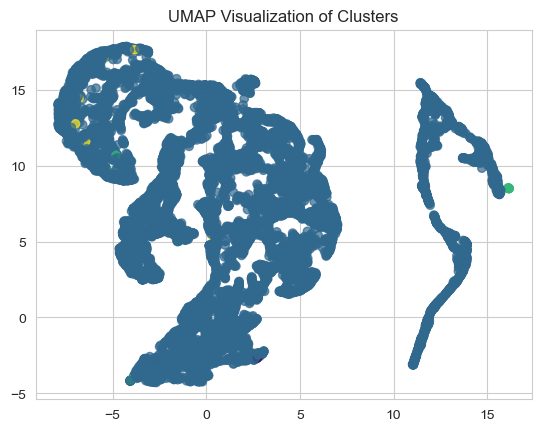

In [21]:
plot_clusters_umap(dbscan_df)

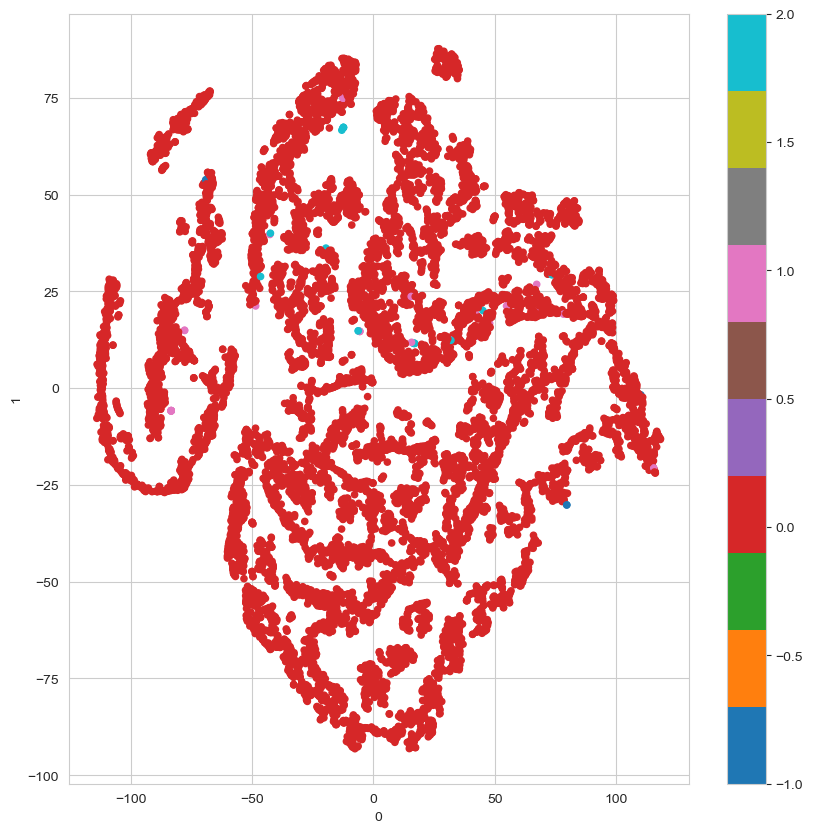

In [22]:
plot_clusters_tsne(dbscan_df)

# Checking results (double check it with ChatGPT later)
## View results
- Check if the cluster center (mean) of any variables doesn't vary much between clusters, if so, we can drop it.
- If there are clusters with too few customers, we can check if the center of the variables is similar to the other clusters, if so, we can merge them.


## Visualization
- We can plot cluster centers:
```python
df.groupby('labels') \ [scaled_features].mean().plot(kind='bar')
```

# Feature reduction
- Factor Analysis
- Multidimensional scaling